# Objectives

- View the Liquidity provider token as derivative
- Compare that to a standard derivative 
- Understand why an LP might provide liquidity other than to simply earn fees

# Prerequisites

- Metamask
- Web3 python

# Interacting with GUI

We first obtain LP tokens for Uniswap v2 by depositing some liquidity to the LabETH/LabUSD pool.

## Depositing liquidity

- Deposit liquidity for LabETH and LabUSD into the Uniswap v2 pool [here](https://goerli.etherscan.io/address/0x7a250d5630b4cf539739df2c5dacb4c659f2488d)
- Go to Write Contract
- Use the depositLiquidity function to put liquidity in the LETH/LUSD Uniswap v2 pool
- Put token A as 0xb85154E1948e52214A5F134172358Fb5010F6282
- Put token B as 0x4966Bb6Cd9f3e042331b0798525b7970eFB0D94A
- Deposit 1 LETH and 1000 LUSD (don't forget to put 18 zeros after each quantity)
- See confirmation transaction and minted Uniswap V2 ERC20 tokens in your account

# Derivatives and their payoff functions

Investing has grown more complicated in recent decades with the creation of numerous derivative instruments offering new ways to manage money. The use of derivatives to hedge risk or improve returns has been around for generations.

**Options** are the simplest derivative investment. Their value is tied to the value of the contract's underlying security. Options give a buyer the opportunity to buy or sell the underlying security. The investor does not own the underlying asset but they make a bet on the direction of its price movement.

The payoff function of an option shows the profit/loss obtained from an option depending on its market price.

There are many types of derivative instruments, including options, swaps, futures, and forward contracts. Derivatives have numerous uses and various levels of risks but are generally considered a sound way to participate in the financial markets.

## Example: call/put options

A call option is a type of option that gives the holder the right to buy the underlying asset at a specified price, known as the strike price, before the option expires. If the price of the underlying asset rises above the strike price, the holder can exercise the option and purchase the asset at the lower strike price, then sell it at the higher market price for a profit. If the price does not rise above the strike price, the holder can choose not to exercise the option and simply let it expire worthless. Its payoff function has been shown below.
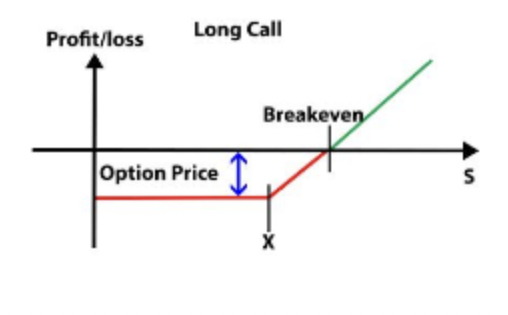

On the other hand, a put option is a type of option that gives the holder the right to sell the underlying asset at a specified price, before the option expires. If the price of the underlying asset falls below the strike price, the holder can exercise the option and sell the asset at the higher strike price, then buy it back at the lower market price for a profit. If the price does not fall below the strike price, the holder can choose not to exercise the option and simply let it expire worthless. In both cases, the holder pays a premium for the option contract, which is the price of the option, and if the option is not exercised, this premium represents a loss for the holder. Its payoff function has been shown below.
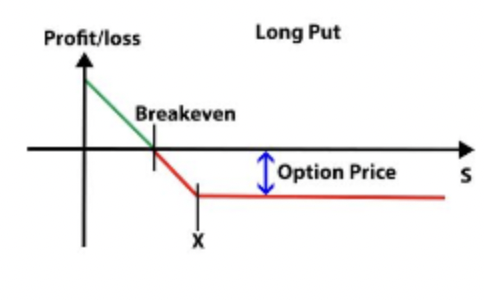

# What is the payoff function of an LP token?

In this lab, we look at an LP token as a derivative of the underlying token pairs and plot its payoff function.

## Connect to web3 API

In [ ]:
from web3 import Web3
import time
import matplotlib.pyplot as plt

alchemy_url = "https://goerli.infura.io/v3/YOUR_INFURA_API_KEY"

w3 = Web3(Web3.HTTPProvider(alchemy_url))

your_address = Web3.toChecksumAddress('YOUR_PUBLIC_ADDRESS')
your_private_key = 'YOUR_PRIVATE_KEY'


print(w3.__dict__)

## Identify the LUSD/LETH pool

We now identify the LUSD/LETH liquidity pool address through the [Uniswap v2 factory contract](https://goerli.etherscan.io/address/0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f#code).

In [ ]:
factory = '0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f'
factory_api = '[{"inputs":[{"internalType":"address","name":"_feeToSetter","type":"address"}],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"token0","type":"address"},{"indexed":true,"internalType":"address","name":"token1","type":"address"},{"indexed":false,"internalType":"address","name":"pair","type":"address"},{"indexed":false,"internalType":"uint256","name":"","type":"uint256"}],"name":"PairCreated","type":"event"},{"constant":true,"inputs":[{"internalType":"uint256","name":"","type":"uint256"}],"name":"allPairs","outputs":[{"internalType":"address","name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"allPairsLength","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"tokenA","type":"address"},{"internalType":"address","name":"tokenB","type":"address"}],"name":"createPair","outputs":[{"internalType":"address","name":"pair","type":"address"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"feeTo","outputs":[{"internalType":"address","name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"feeToSetter","outputs":[{"internalType":"address","name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"internalType":"address","name":"","type":"address"},{"internalType":"address","name":"","type":"address"}],"name":"getPair","outputs":[{"internalType":"address","name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"_feeTo","type":"address"}],"name":"setFeeTo","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"_feeToSetter","type":"address"}],"name":"setFeeToSetter","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"}]'
factory_contract = w3.eth.contract(address=factory, abi=factory_api)
checksum_LUSD = Web3.toChecksumAddress('0x4966Bb6Cd9f3e042331b0798525b7970eFB0D94A')
checksum_LETH = Web3.toChecksumAddress('0xb85154E1948e52214A5F134172358Fb5010F6282')

factory_contract.functions.getPair(checksum_LUSD, checksum_LETH).call() # CALL THE getPair FUNCTION

## Obtain LP Payoffs in LUSD

First we obtain our balance of Uniswap v2 LP tokens for the pool we deposited liquidity to.

In [ ]:
UNI_address = Web3.toChecksumAddress('PASTE_UNISWAP_V2_TOKEN_CONTRACT')
UNI_abi = '[{"inputs":[],"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"owner","type":"address"},{"indexed":true,"internalType":"address","name":"spender","type":"address"},{"indexed":false,"internalType":"uint256","name":"value","type":"uint256"}],"name":"Approval","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"previousOwner","type":"address"},{"indexed":true,"internalType":"address","name":"newOwner","type":"address"}],"name":"OwnershipTransferred","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"from","type":"address"},{"indexed":true,"internalType":"address","name":"to","type":"address"},{"indexed":false,"internalType":"uint256","name":"value","type":"uint256"}],"name":"Transfer","type":"event"},{"inputs":[{"internalType":"address","name":"owner","type":"address"},{"internalType":"address","name":"spender","type":"address"}],"name":"allowance","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"spender","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"approve","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"account","type":"address"}],"name":"balanceOf","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"decimals","outputs":[{"internalType":"uint8","name":"","type":"uint8"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"spender","type":"address"},{"internalType":"uint256","name":"subtractedValue","type":"uint256"}],"name":"decreaseAllowance","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"spender","type":"address"},{"internalType":"uint256","name":"addedValue","type":"uint256"}],"name":"increaseAllowance","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"mint","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"name","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"owner","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"renounceOwnership","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"symbol","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"totalSupply","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"transfer","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"from","type":"address"},{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"transferFrom","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"newOwner","type":"address"}],"name":"transferOwnership","outputs":[],"stateMutability":"nonpayable","type":"function"}]'
univ2_token_contract = w3.eth.contract(address=UNI_address, abi=UNI_abi)
LP_amount = univ2_token_contract.functions.balanceOf(your_address).call() / 10**18
print("Number of LP tokens with you : ",LP_amount)

Now, we write a function that calculates the payoff of the LP token you have. This is same as anwering the following question : how much wealth in USD will I get back if I withdraw my liquidity position at the current price?

In [ ]:
# Code that imports LP token charactersitic from transaction ID
# Code that monitors Liquidity pool to set #redeemable token from LUSD/LETH pair
def getLPpayoff():
    LP_address = UNI_address
    LP_abi = '[{"inputs":[],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"owner","type":"address"},{"indexed":true,"internalType":"address","name":"spender","type":"address"},{"indexed":false,"internalType":"uint256","name":"value","type":"uint256"}],"name":"Approval","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"sender","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount0","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"amount1","type":"uint256"},{"indexed":true,"internalType":"address","name":"to","type":"address"}],"name":"Burn","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"sender","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount0","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"amount1","type":"uint256"}],"name":"Mint","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"sender","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount0In","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"amount1In","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"amount0Out","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"amount1Out","type":"uint256"},{"indexed":true,"internalType":"address","name":"to","type":"address"}],"name":"Swap","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"uint112","name":"reserve0","type":"uint112"},{"indexed":false,"internalType":"uint112","name":"reserve1","type":"uint112"}],"name":"Sync","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"from","type":"address"},{"indexed":true,"internalType":"address","name":"to","type":"address"},{"indexed":false,"internalType":"uint256","name":"value","type":"uint256"}],"name":"Transfer","type":"event"},{"constant":true,"inputs":[],"name":"DOMAIN_SEPARATOR","outputs":[{"internalType":"bytes32","name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"MINIMUM_LIQUIDITY","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"PERMIT_TYPEHASH","outputs":[{"internalType":"bytes32","name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"internalType":"address","name":"","type":"address"},{"internalType":"address","name":"","type":"address"}],"name":"allowance","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"spender","type":"address"},{"internalType":"uint256","name":"value","type":"uint256"}],"name":"approve","outputs":[{"internalType":"bool","name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[{"internalType":"address","name":"","type":"address"}],"name":"balanceOf","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"to","type":"address"}],"name":"burn","outputs":[{"internalType":"uint256","name":"amount0","type":"uint256"},{"internalType":"uint256","name":"amount1","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"decimals","outputs":[{"internalType":"uint8","name":"","type":"uint8"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"factory","outputs":[{"internalType":"address","name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"getReserves","outputs":[{"internalType":"uint112","name":"_reserve0","type":"uint112"},{"internalType":"uint112","name":"_reserve1","type":"uint112"},{"internalType":"uint32","name":"_blockTimestampLast","type":"uint32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"_token0","type":"address"},{"internalType":"address","name":"_token1","type":"address"}],"name":"initialize","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"kLast","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"to","type":"address"}],"name":"mint","outputs":[{"internalType":"uint256","name":"liquidity","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"name","outputs":[{"internalType":"string","name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"internalType":"address","name":"","type":"address"}],"name":"nonces","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"owner","type":"address"},{"internalType":"address","name":"spender","type":"address"},{"internalType":"uint256","name":"value","type":"uint256"},{"internalType":"uint256","name":"deadline","type":"uint256"},{"internalType":"uint8","name":"v","type":"uint8"},{"internalType":"bytes32","name":"r","type":"bytes32"},{"internalType":"bytes32","name":"s","type":"bytes32"}],"name":"permit","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"price0CumulativeLast","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"price1CumulativeLast","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"to","type":"address"}],"name":"skim","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"internalType":"uint256","name":"amount0Out","type":"uint256"},{"internalType":"uint256","name":"amount1Out","type":"uint256"},{"internalType":"address","name":"to","type":"address"},{"internalType":"bytes","name":"data","type":"bytes"}],"name":"swap","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"symbol","outputs":[{"internalType":"string","name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"sync","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"token0","outputs":[{"internalType":"address","name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"token1","outputs":[{"internalType":"address","name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"totalSupply","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"value","type":"uint256"}],"name":"transfer","outputs":[{"internalType":"bool","name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"from","type":"address"},{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"value","type":"uint256"}],"name":"transferFrom","outputs":[{"internalType":"bool","name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"}]'
    LP_contract = w3.eth.contract(address=LP_address, abi=LP_abi)
    
    total_supply = LP_contract.functions.totalSupply().call() / 10**18
    
    percentage_pool = LP_amount / total_supply # your contribution in the pool
    LUSD_reserve = LP_contract.functions.getReserves().call()[0] / 10**18 # Total LUSD reserves in the pool 
    LETH_reserve = LP_contract.functions.getReserves().call()[1] / 10**18 # Total LETH reserves in the pool
    LETH_price = LUSD_reserve / LETH_reserve # Price of LETH in terms of LUSD
    
    # TODO - FILL IN WHAT THE TOTAL VALUE OF YOUR SHARE OF THE RESERVES IS (IN UNITS OF LUSD)
    LUSD_payoff = ? # USE percentage_pool, LUSD_reserve, LETH_reserve, LETH_price

    return (LETH_price, LUSD_payoff)

print(getLPpayoff())

## Calculate LP token payoffs

We now calculate LP payoffs for a range of prices. To do that, the TA will manipualte the pool price by doing large swaps.

In [ ]:
# Perform high-impact swaps in iterations and calculate LP payoffs
iterations = 10
iter = 0
LETH_prices = []
LUSD_payoffs = []

You would have to run the following cell once after each time the pool price is manipulated. You can view if the manipulation was successful by monitoring the [TA's account on etherscan](https://goerli.etherscan.io/address/0x339D871eee01FABeEd6Ea3012842742d74f67977).

In [ ]:
# RUN THIS LOOP AFTER EACH SWAP
print("Iteration: ", iter)

(LETH_price, LUSD_payoff) = getLPpayoff()

print("LETH price: ", LETH_price, ", LUSD payoff: ", LUSD_payoff)

LETH_prices.append(LETH_price)
LUSD_payoffs.append(LUSD_payoff)

iter += 1
    

## Plot LP token payoffs

In [ ]:
# draw the plot
plt.figure(figsize=(10, 6))
plt.plot(LETH_prices, LUSD_payoffs, 'ro')
plt.xlabel('LETH price in LUSD')
plt.ylabel('LP payoff in LUSD')
plt.title('Calculate LP token payoff')
plt.grid(True)
plt.show()

Make sure to save the plot obtained above on your machine.

# Replicating market makers

Turns out you can generate a rich family of payoffs using a CFMM. In fact there is a one-to-one mapping between concave payoffs and CFMM bonding curves! Convex payoffs can be obtained by shorting an LP token.

This implies that LPs might not invest money in pools to just earn fees, they might also want to take bets on prices of the underlying tokens, or hedge their other investments in some way. We can tailor the bonding curve based on the sort of payoff function the LP is looking for.

If anyone is interested to know this mapping and how it is obtained, see [this paper](https://arxiv.org/pdf/2103.14769.pdf). 

